In [1991]:
# install.packages("Metrics")

In [1992]:
# libraries
library(readxl)
options(warn = 0)
library(tidyverse)
library(readxl)
library(lubridate)
library(zoo)
library(readxl)
library(neuralnet)
library(knitr)
library(Metrics)

In [1993]:
df <- read_excel("data/UOW_load.xlsx")
head(df)

Dates,09:00,10:00,11:00
<dttm>,<dbl>,<dbl>,<dbl>
2018-01-01,89.4,90.6,88.6
2018-01-02,108.2,104.6,106.0
2018-01-03,110.0,111.6,114.8
2018-01-04,106.4,104.4,109.0
2018-01-05,97.8,100.4,102.4
2018-01-06,87.0,90.8,87.2


In [1994]:
df$Dates<-as.Date(df$Dates)

In [1995]:
names(df)[2] <- paste("ninth_hour")
names(df)[3] <- paste("tenth_hour")
names(df)[4] <- paste("eleventh_hour")
head(df)

Dates,ninth_hour,tenth_hour,eleventh_hour
<date>,<dbl>,<dbl>,<dbl>
2018-01-01,89.4,90.6,88.6
2018-01-02,108.2,104.6,106.0
2018-01-03,110.0,111.6,114.8
2018-01-04,106.4,104.4,109.0
2018-01-05,97.8,100.4,102.4
2018-01-06,87.0,90.8,87.2


In [1996]:
summary(df[2:4])

   ninth_hour       tenth_hour     eleventh_hour   
 Min.   : 50.40   Min.   : 49.20   Min.   : 48.20  
 1st Qu.: 81.55   1st Qu.: 83.00   1st Qu.: 84.75  
 Median : 97.50   Median :102.80   Median :105.40  
 Mean   : 95.35   Mean   : 99.63   Mean   :102.83  
 3rd Qu.:110.60   3rd Qu.:116.05   3rd Qu.:120.90  
 Max.   :141.20   Max.   :148.80   Max.   :156.40  

In [1997]:
# insert all the inputs to the one data frame
# creating revious time frame values for autoregressive model 
df_full = df %>%
 mutate(
    previous_one_day_ninth_hour = lag(df$ninth_hour,1),
    previous_one_day_tenth_hour = lag(df$tenth_hour,1),
    previous_two_day_ninth_hour = lag(df$ninth_hour,2),
    previous_two_day_tenth_hour = lag(df$tenth_hour,2),
    previous_one_day_eleventh_hour = lag(df$eleventh_hour,1),
    previous_two_day_eleventh_hour = lag(df$eleventh_hour,2),
    previous_three_day_eleventh_hour = lag(df$eleventh_hour,3),
    previous_four_day_eleventh_hour = lag(df$eleventh_hour,4),
    seven_day_rolling_mean = rollmean(eleventh_hour,7, fill = NA)) %>%
#Drop null coulumns
drop_na()


In [1998]:
head(df_full)

Dates,ninth_hour,tenth_hour,eleventh_hour,previous_one_day_ninth_hour,previous_one_day_tenth_hour,previous_two_day_ninth_hour,previous_two_day_tenth_hour,previous_one_day_eleventh_hour,previous_two_day_eleventh_hour,previous_three_day_eleventh_hour,previous_four_day_eleventh_hour,seven_day_rolling_mean
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-05,97.8,100.4,102.4,106.4,104.4,110.0,111.6,109.0,114.8,106.0,88.6,100.4571
2018-01-06,87.0,90.8,87.2,97.8,100.4,106.4,104.4,102.4,109.0,114.8,106.0,101.8857
2018-01-07,68.8,67.0,67.6,87.0,90.8,97.8,100.4,87.2,102.4,109.0,114.8,101.8000
2018-01-08,110.2,113.0,116.2,68.8,67.0,87.0,90.8,67.6,87.2,102.4,109.0,102.4286
2018-01-09,111.2,119.2,116.0,110.2,113.0,68.8,67.0,116.2,67.6,87.2,102.4,105.0000
2018-01-10,109.0,114.6,114.2,111.2,119.2,110.2,113.0,116.0,116.2,67.6,87.2,104.6571


## Input vercors

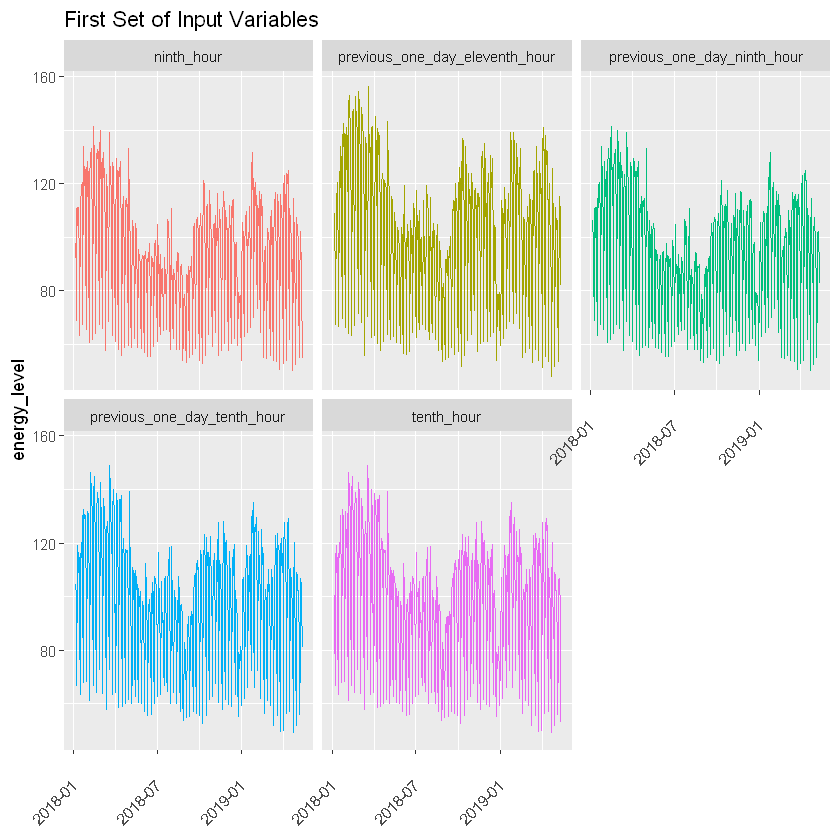

In [1999]:
#1st lag
df_full %>%
pivot_longer(cols = c(2, 3, 5, 6, 9), names_to = "kind", values_to = "energy_level") %>%
ggplot(aes(Dates, energy_level, color = kind)) +
geom_line() +
facet_wrap(~kind) + theme(axis.text.x = element_text(angle = 45, vjust =
0.5, hjust = 1
)) +
labs(x = "",
title = "First Set of Input Variables") +
theme(legend.position = "none")


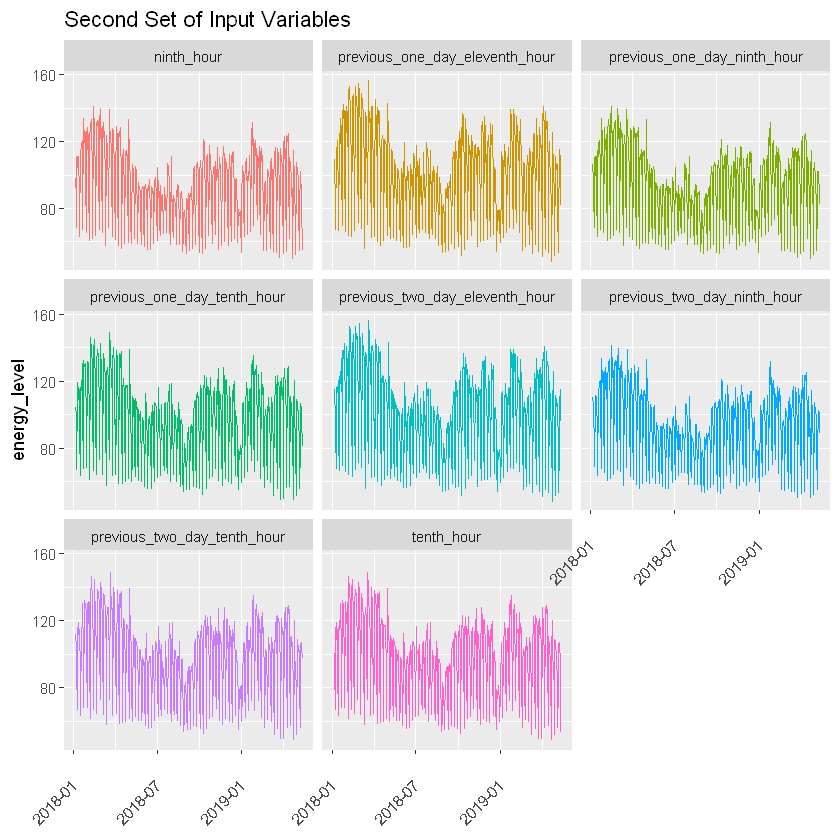

In [2000]:
#2nd lag
df_full %>%
pivot_longer(cols = c(5, 6, 9, 2, 3, 7, 8, 10), names_to = "kind", values_to = "energy_level") %>%
ggplot(aes(Dates, energy_level, color = kind)) +
geom_line() +
facet_wrap(~kind) + theme(axis.text.x = element_text(angle = 45, vjust =
0.5, hjust = 1
)) +
labs(x = "",
title = "Second Set of Input Variables") +
theme(legend.position = "none")

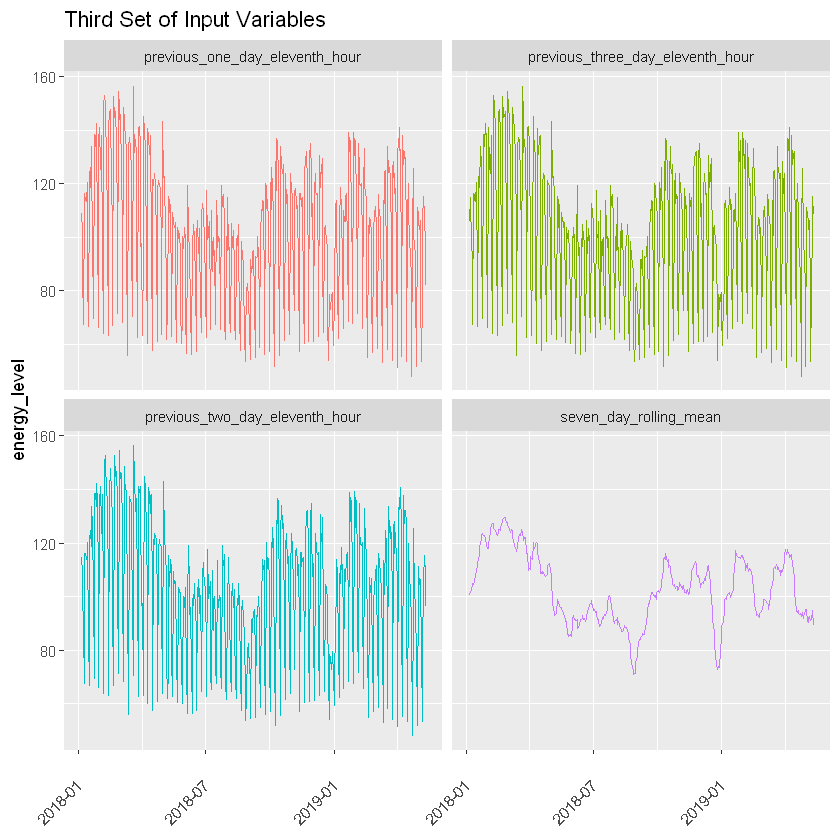

In [2001]:
#3rd lag
df_full %>%
pivot_longer(cols = c(9,10,11,13), names_to = "kind", values_to = "energy_level") %>%
ggplot(aes(Dates, energy_level, color = kind)) +
geom_line() +
facet_wrap(~kind) + theme(axis.text.x = element_text(angle = 45, vjust =
0.5, hjust = 1
)) +
labs(x = "",
title = "Third Set of Input Variables") +
theme(legend.position = "none")

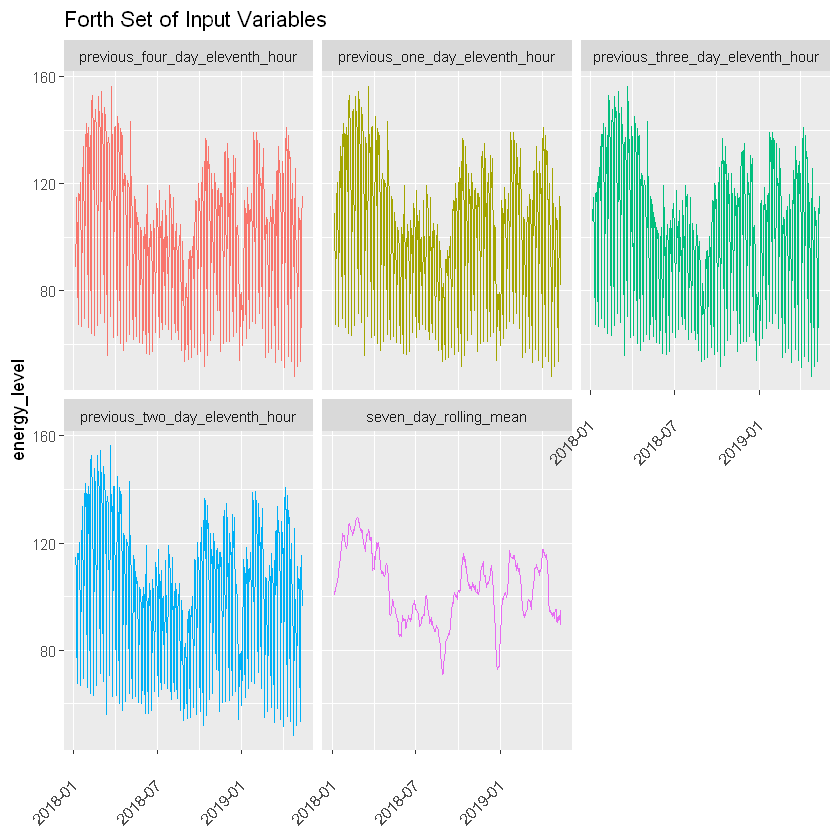

In [2002]:
#4thd lag
df_full %>%
pivot_longer(cols = c(9,10,11,12,13), names_to = "kind", values_to = "energy_level") %>%
ggplot(aes(Dates, energy_level, color = kind)) +
geom_line() +
facet_wrap(~kind) + theme(axis.text.x = element_text(angle = 45, vjust =
0.5, hjust = 1
)) +
labs(x = "",
title = "Forth Set of Input Variables") +
theme(legend.position = "none")

# Data Normalization

In [2003]:
head(df_full)

Dates,ninth_hour,tenth_hour,eleventh_hour,previous_one_day_ninth_hour,previous_one_day_tenth_hour,previous_two_day_ninth_hour,previous_two_day_tenth_hour,previous_one_day_eleventh_hour,previous_two_day_eleventh_hour,previous_three_day_eleventh_hour,previous_four_day_eleventh_hour,seven_day_rolling_mean
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-05,97.8,100.4,102.4,106.4,104.4,110.0,111.6,109.0,114.8,106.0,88.6,100.4571
2018-01-06,87.0,90.8,87.2,97.8,100.4,106.4,104.4,102.4,109.0,114.8,106.0,101.8857
2018-01-07,68.8,67.0,67.6,87.0,90.8,97.8,100.4,87.2,102.4,109.0,114.8,101.8000
2018-01-08,110.2,113.0,116.2,68.8,67.0,87.0,90.8,67.6,87.2,102.4,109.0,102.4286
2018-01-09,111.2,119.2,116.0,110.2,113.0,68.8,67.0,116.2,67.6,87.2,102.4,105.0000
2018-01-10,109.0,114.6,114.2,111.2,119.2,110.2,113.0,116.0,116.2,67.6,87.2,104.6571


##### min-max normalization

In [2004]:
min_max_normalize <- function(x) {
return ((x - min(x)) / (max(x) - min(x))) }


unnormalize_eleventh_hour <- function(x) {
return( (max(df_full$eleventh_hour) - min(df_full$eleventh_hour))*x + min(df_full$eleventh_hour)) }


In [2005]:
df_normalized <- as.data.frame(lapply(df_full[2:13], min_max_normalize))
head(df_normalized)

,ninth_hour,tenth_hour,eleventh_hour,previous_one_day_ninth_hour,previous_one_day_tenth_hour,previous_two_day_ninth_hour,previous_two_day_tenth_hour,previous_one_day_eleventh_hour,previous_two_day_eleventh_hour,previous_three_day_eleventh_hour,previous_four_day_eleventh_hour,seven_day_rolling_mean
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5220264,0.5140562,0.5009242,0.6167401,0.5542169,0.6563877,0.6265060,0.5619224,0.6155268,0.5341959,0.3733826,0.5036425
2,0.4030837,0.4176707,0.3604436,0.5220264,0.5140562,0.6167401,0.5542169,0.5009242,0.5619224,0.6155268,0.5341959,0.5279262
3,0.2026432,0.1787149,0.1792976,0.4030837,0.4176707,0.5220264,0.5140562,0.3604436,0.5009242,0.5619224,0.6155268,0.5264692
4,0.6585903,0.6405622,0.6284658,0.2026432,0.1787149,0.4030837,0.4176707,0.1792976,0.3604436,0.5009242,0.5619224,0.5371540
5,0.6696035,0.7028112,0.6266174,0.6585903,0.6405622,0.2026432,0.1787149,0.6284658,0.1792976,0.3604436,0.5009242,0.5808645
6,0.6453744,0.6566265,0.6099815,0.6696035,0.7028112,0.6585903,0.6405622,0.6266174,0.6284658,0.1792976,0.3604436,0.5750364


In [2006]:
set.seed(123)
df_train <- df_normalized[1:430,]
df_test <- df_normalized[431:493,]

In [2007]:
relevant_pred_stat <- function(true_value, predicted_value, model_kind) {
rbind((tibble(truth = true_value,prediction = predicted_value) %>% rmse(truth,prediction) %>% mutate(type = model_kind)),
    (tibble(truth = true_value,prediction = predicted_value) %>% mape(truth,prediction) %>% mutate(type = model_kind)),
    (tibble(truth = true_value,prediction = predicted_value) %>% mae(truth,prediction) %>% mutate(type = model_kind)))
}

In [2008]:
model_one_hidden_layer = function(arg, hidden_first, activation_fun, learning_rate, test_data, model_type) {
    one_layer_nurelnet = neuralnet(arg,
    data=df_train, 
    hidden = c(hidden_first), 
    linear.output = TRUE, 
    act.fct = activation_fun,
    learningrate = learning_rate
    )
    results = compute(one_layer_nurelnet, test_data)
    truth_column = df_full[431:493, 4]$eleventh_hour
    predicted_column =  unnormalize_eleventh_hour(results$net.result)[,1]
    
    results <- data.frame(
        model_type = model_type, 
        hidden_layers = hidden_first, 
        RMSE = rmse(truth_column,predicted_column), 
        MAE = mae(truth_column, predicted_column), 
        MAPE =mape(truth_column, predicted_column),
        act_function = activation_fun,
        learning_rate = learning_rate)
}

In [2009]:
model_two_hidden_layer = function(arg, hidden_first, hidden_second, activation_fun, learning_rate, test_data, model_type) {
    one_layer_nurelnet = neuralnet(arg,
    data=df_train, 
    hidden = c(hidden_first, hidden_second), 
    linear.output = TRUE, 
    act.fct = activation_fun,
    learningrate = learning_rate
    )
    results = compute(one_layer_nurelnet, test_data)
    truth_column = df_full[431:493, 4]$eleventh_hour
    predicted_column =  unnormalize_eleventh_hour(results$net.result)[,1]

    results <- data.frame(
        model_type = model_type, 
        hidden_layers = hidden_first, 
        RMSE = rmse(truth_column,predicted_column), 
        MAE = mae(truth_column, predicted_column), 
        MAPE =mape(truth_column, predicted_column),
        act_function = activation_fun,
        learning_rate = learning_rate)    
}

# Single Layer Neural Networks with different input sets and neurons

1st lag

In [2010]:
set.seed(12345)

In [2011]:
neuralnet_first_inset = lapply(1:10, function(n){ 
    model_one_hidden_layer(
        "eleventh_hour~ninth_hour+tenth_hour+previous_one_day_ninth_hour+previous_one_day_tenth_hour+previous_one_day_eleventh_hour", 
        n, 
        "logistic", 
        0.01,
        df_test[, c(1, 2, 4, 5, 8)],
        "First Set of Input Variables"
                        )
    })
kable(neuralnet_first_inset[])



|model_type                   | hidden_layers|   RMSE|      MAE|      MAPE|act_function | learning_rate|
|:----------------------------|-------------:|------:|--------:|---------:|:------------|-------------:|
|First Set of Input Variables |             1| 4.5104| 3.176271| 0.0322746|logistic     |          0.01|

|model_type                   | hidden_layers|    RMSE|      MAE|      MAPE|act_function | learning_rate|
|:----------------------------|-------------:|-------:|--------:|---------:|:------------|-------------:|
|First Set of Input Variables |             2| 4.39635| 3.015967| 0.0298124|logistic     |          0.01|

|model_type                   | hidden_layers|    RMSE|      MAE|      MAPE|act_function | learning_rate|
|:----------------------------|-------------:|-------:|--------:|---------:|:------------|-------------:|
|First Set of Input Variables |             3| 4.36997| 2.962272| 0.0289265|logistic     |          0.01|

|model_type                   | hidden_layer

2nd lag

In [2012]:
set.seed(12345)

In [2013]:
neuralnet_second_inset = lapply(1:10, function(n){ 
    model_one_hidden_layer(
        "eleventh_hour~ninth_hour+tenth_hour+previous_one_day_ninth_hour+previous_one_day_tenth_hour+previous_one_day_eleventh_hour+previous_two_day_ninth_hour+previous_two_day_tenth_hour+previous_two_day_eleventh_hour", 
        n, 
        "logistic", 
        0.01,
        df_test[, c(1, 2, 4, 5, 6, 7, 8, 9)],
        "Second Set of Input Variables"
                        )
    })
kable(neuralnet_second_inset[])



|model_type                    | hidden_layers|     RMSE|      MAE|      MAPE|act_function | learning_rate|
|:-----------------------------|-------------:|--------:|--------:|---------:|:------------|-------------:|
|Second Set of Input Variables |             1| 7.687926| 5.409914| 0.0552789|logistic     |          0.01|

|model_type                    | hidden_layers|     RMSE|      MAE|      MAPE|act_function | learning_rate|
|:-----------------------------|-------------:|--------:|--------:|---------:|:------------|-------------:|
|Second Set of Input Variables |             2| 9.244592| 5.820556| 0.0553525|logistic     |          0.01|

|model_type                    | hidden_layers|    RMSE|      MAE|      MAPE|act_function | learning_rate|
|:-----------------------------|-------------:|-------:|--------:|---------:|:------------|-------------:|
|Second Set of Input Variables |             3| 9.34821| 6.553755| 0.0651112|logistic     |          0.01|

|model_type               

3rd lag

In [2014]:
neuralnet_third_inset = lapply(1:10, function(n){ 
    model_one_hidden_layer(
        "eleventh_hour~previous_one_day_eleventh_hour+previous_two_day_eleventh_hour+previous_three_day_eleventh_hour+seven_day_rolling_mean", 
        n, 
        "logistic", 
        0.01,
        df_test[, c(8, 9, 10, 12)],
        "Third Set of Input Variables"
                        )
    })
kable(neuralnet_third_inset[])



|model_type                   | hidden_layers|     RMSE|      MAE|      MAPE|act_function | learning_rate|
|:----------------------------|-------------:|--------:|--------:|---------:|:------------|-------------:|
|Third Set of Input Variables |             1| 21.55864| 16.82453| 0.2028478|logistic     |          0.01|

|model_type                   | hidden_layers|     RMSE|      MAE|      MAPE|act_function | learning_rate|
|:----------------------------|-------------:|--------:|--------:|---------:|:------------|-------------:|
|Third Set of Input Variables |             2| 22.22464| 16.50115| 0.1961102|logistic     |          0.01|

|model_type                   | hidden_layers|     RMSE|     MAE|      MAPE|act_function | learning_rate|
|:----------------------------|-------------:|--------:|-------:|---------:|:------------|-------------:|
|Third Set of Input Variables |             3| 12.22007| 9.37655| 0.1119275|logistic     |          0.01|

|model_type                   | hid

4th lag

In [2016]:
neuralnet_forth_inset = lapply(1:10, function(n){ 
    model_one_hidden_layer(
        "eleventh_hour~previous_one_day_eleventh_hour+previous_two_day_eleventh_hour+previous_three_day_eleventh_hour+previous_four_day_eleventh_hour+seven_day_rolling_mean", 
        n, 
        "logistic", 
        0.01,
        df_test[, c(8, 9, 10, 11, 12)],
        "Third Set of Input Variables"
                        )
    })
kable(neuralnet_forth_inset[])



|model_type                   | hidden_layers|     RMSE|     MAE|      MAPE|act_function | learning_rate|
|:----------------------------|-------------:|--------:|-------:|---------:|:------------|-------------:|
|Third Set of Input Variables |             1| 19.80806| 14.8502| 0.1820227|logistic     |          0.01|

|model_type                   | hidden_layers|     RMSE|      MAE|      MAPE|act_function | learning_rate|
|:----------------------------|-------------:|--------:|--------:|---------:|:------------|-------------:|
|Third Set of Input Variables |             2| 20.51674| 15.19489| 0.1806688|logistic     |          0.01|

|model_type                   | hidden_layers|     RMSE|      MAE|      MAPE|act_function | learning_rate|
|:----------------------------|-------------:|--------:|--------:|---------:|:------------|-------------:|
|Third Set of Input Variables |             3| 11.57664| 8.730797| 0.1040766|logistic     |          0.01|

|model_type                   | hid

minimum error in each input set